### Support vector classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=2,
    n_redundant=0
                         )

<Axes: xlabel='0', ylabel='1'>

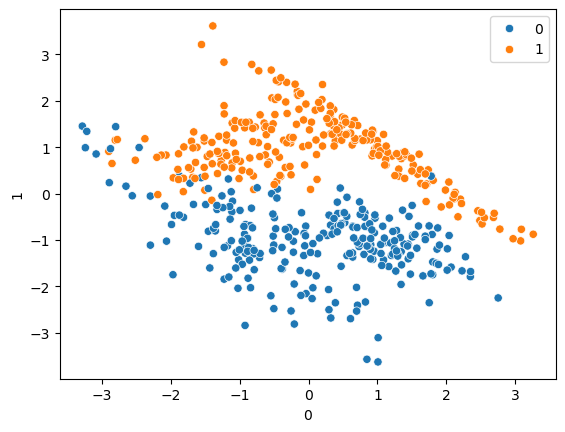

In [4]:
sns.scatterplot(
    x=pd.DataFrame(X)[0],
    y=pd.DataFrame(X)[1],
    hue = y)

### Import the model

In [5]:
from sklearn.svm import SVC

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [8]:
svc = SVC(kernel='linear')

In [9]:
svc.fit(X_train ,y_train)

SVC(kernel='linear')

In [10]:
y_train_pred = svc.predict( X_train )

y_test_pred = svc.predict( X_test )

In [11]:
from sklearn.metrics import classification_report , confusion_matrix

In [12]:
print('The classification report of the training sample ')
print(f'{classification_report(y_train , y_train_pred)}')


print("Confusion Matrix")
print(confusion_matrix(y_train , y_train_pred))

The classification report of the training sample 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       183
           1       0.94      0.95      0.95       192

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375

Confusion Matrix
[[172  11]
 [ 10 182]]


In [13]:
print('The classification report of the testing sample ')
print(f'{classification_report(y_test , y_test_pred)}')


print("Confusion Matrix")
print(confusion_matrix(y_test , y_test_pred))

The classification report of the testing sample 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.92      0.95      0.93        58

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125

Confusion Matrix
[[62  5]
 [ 3 55]]


In [14]:
rbf = SVC(kernel='rbf')

In [15]:
rbf.fit(X_train ,y_train)

SVC()

In [16]:
y_train_pred = rbf.predict( X_train )

y_test_pred = rbf.predict( X_test )

In [17]:
print('The classification report of the training sample ')
print(f'{classification_report(y_train , y_train_pred)}')


print("Confusion Matrix")
print(confusion_matrix(y_train , y_train_pred))

The classification report of the training sample 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       183
           1       0.96      0.97      0.97       192

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375

Confusion Matrix
[[175   8]
 [  5 187]]


In [18]:
print('The classification report of the testing sample ')
print(f'{classification_report(y_test , y_test_pred)}')


print("Confusion Matrix")
print(confusion_matrix(y_test , y_test_pred))

The classification report of the testing sample 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.93      0.98      0.96        58

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125

Confusion Matrix
[[63  4]
 [ 1 57]]


### hyper parameter tunning with svc

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [21]:
grid = GridSearchCV( SVC() ,  param_grid = param_grid, cv = 5 , refit=True , verbose=3 )

In [22]:
grid.fit( X_train , y_train )

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [24]:
y_train_pred = grid.predict( X_train )

y_test_pred = grid.predict( X_test )